In [1]:
import pandas as pd 
import numpy as np

In [2]:
recipe =pd.read_csv('recipes.csv')
# recipe.head()

In [3]:
recipe.drop(
  ['RecipeYield', 'RecipeServings', 'ReviewCount', 'AggregatedRating',
   'RecipeIngredientParts', 'RecipeIngredientQuantities', 'DatePublished',
   'TotalTime', 'PrepTime', 'CookTime', 'AuthorName', 'AuthorId'],
  axis=1,
  inplace=True,
  errors='ignore'
)

In [4]:
recipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   RecipeId             522517 non-null  int64  
 1   Name                 522517 non-null  object 
 2   Description          522512 non-null  object 
 3   Images               522516 non-null  object 
 4   RecipeCategory       521766 non-null  object 
 5   Keywords             505280 non-null  object 
 6   Calories             522517 non-null  float64
 7   FatContent           522517 non-null  float64
 8   SaturatedFatContent  522517 non-null  float64
 9   CholesterolContent   522517 non-null  float64
 10  SodiumContent        522517 non-null  float64
 11  CarbohydrateContent  522517 non-null  float64
 12  FiberContent         522517 non-null  float64
 13  SugarContent         522517 non-null  float64
 14  ProteinContent       522517 non-null  float64
 15  RecipeInstruction

In [5]:
recipe.isnull().sum()

RecipeId                   0
Name                       0
Description                5
Images                     1
RecipeCategory           751
Keywords               17237
Calories                   0
FatContent                 0
SaturatedFatContent        0
CholesterolContent         0
SodiumContent              0
CarbohydrateContent        0
FiberContent               0
SugarContent               0
ProteinContent             0
RecipeInstructions         0
dtype: int64

In [6]:
recipe.shape

(522517, 16)

In [7]:
recipe['Keywords'] = recipe['Keywords'].fillna('Unknown')
recipe['RecipeCategory']= recipe['RecipeCategory'].fillna('Unknown')


In [8]:
recipe.dropna(subset=['Images'], inplace=True)
recipe.dropna(subset=['Description'], inplace=True)

In [9]:
recipe.isnull().sum()

RecipeId               0
Name                   0
Description            0
Images                 0
RecipeCategory         0
Keywords               0
Calories               0
FatContent             0
SaturatedFatContent    0
CholesterolContent     0
SodiumContent          0
CarbohydrateContent    0
FiberContent           0
SugarContent           0
ProteinContent         0
RecipeInstructions     0
dtype: int64

In [10]:
recipe.head(5)

,RecipeId,Name,Description,Images,RecipeCategory,Keywords,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",Frozen Desserts,"c(""Dessert"", ""Low Protein"", ""Low Cholesterol"",...",170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",Chicken Breast,"c(""Chicken Thigh & Leg"", ""Chicken"", ""Poultry"",...",1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",Beverages,"c(""Low Protein"", ""Low Cholesterol"", ""Healthy"",...",311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",Soy/Tofu,"c(""Beans"", ""Vegetable"", ""Low Cholesterol"", ""We...",536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",Vegetable,"c(""Low Protein"", ""Vegan"", ""Low Cholesterol"", ""...",103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,"c(""Mix everything together and bring to a boil..."


In [11]:
# till this null value and unnecessary columns are removed

In [12]:
import re

def parse_keywords(val):
    if pd.isnull(val):
        return []
    if val.startswith('c('):  # clean R-style c("...")
        val = re.sub(r'c\((.*?)\)', r'\1', val)
    return [kw.strip().strip('"').strip("'") for kw in val.strip("[]{}()").split(",")]

recipe['Keywords'] = recipe['Keywords'].apply(parse_keywords)


In [13]:
recipe['Keywords'].dropna().head(10)

0    [Dessert, Low Protein, Low Cholesterol, Health...
1    [Chicken Thigh & Leg, Chicken, Poultry, Meat, ...
2    [Low Protein, Low Cholesterol, Healthy, Summer...
3    [Beans, Vegetable, Low Cholesterol, Weeknight,...
4    [Low Protein, Vegan, Low Cholesterol, Healthy,...
5           [Dessert, Weeknight, Stove Top, < 4 Hours]
6                           [Poultry, Meat, < 60 Mins]
7       [Dessert, Healthy, Weeknight, Oven, < 4 Hours]
8                 [Thai, Asian, Free Of..., < 30 Mins]
9    [Cookie & Brownie, Fruit, Nuts, Weeknight, Ove...
Name: Keywords, dtype: object

In [14]:

recipe['RecipeCategory'].value_counts()

RecipeCategory
Dessert              62072
Lunch/Snacks         32586
One Dish Meal        31345
Vegetable            27231
Breakfast            21101
                     ...  
Snacks Sweet             1
Fish Salmon              1
Guatemalan               1
Coconut Cream Pie        1
Labor Day                1
Name: count, Length: 312, dtype: int64

In [15]:
health = pd.read_csv('health_fitness_dataset.csv')

In [16]:
health.head()


,participant_id,date,age,gender,height_cm,weight_kg,bmi,activity_type,duration_minutes,intensity,...,resting_heart_rate,blood_pressure_systolic,blood_pressure_diastolic,endurance_level,sleep_hours,stress_level,hydration_level,smoking_status,health_condition,fitness_level
0,1,2024/1/1,56,F,165.3,50.55,18.50,Dancing,42.1,Low,...,69.5,110.7,72.9,5.37,6.6,4,1.5,Never,NaN,0.04
1,1,2024/1/4,56,F,165.3,55.38,20.27,Swimming,66.9,Low,...,69.5,110.7,72.9,5.39,8.1,3,1.8,Never,NaN,0.07
2,1,2024/1/5,56,F,165.3,56.49,20.68,Swimming,20.0,Medium,...,69.5,110.7,72.9,5.42,6.2,5,2.7,Never,NaN,0.09
3,1,2024/1/7,56,F,165.3,52.23,19.12,Weight Training,23.5,Medium,...,69.5,110.7,72.9,5.44,7.2,4,2.6,Never,NaN,0.21
4,1,2024/1/9,56,F,165.3,53.96,19.75,Swimming,75.0,Medium,...,69.5,110.7,72.9,5.47,7.1,7,1.5,Never,NaN,0.33


In [17]:
# selecting the important columns from the recipe dataset
recipe = recipe[['Name', 'Description', 'Images', 'RecipeInstructions', 'Keywords', 'RecipeCategory', 'Calories', 'FatContent', 'CarbohydrateContent', 'ProteinContent', 'FiberContent', 'SodiumContent', 'SugarContent', 'CholesterolContent']]

In [18]:
recipe.shape

(522512, 14)

In [19]:
#add the recipe type to the dataset
recipe['Type'] = np.random.choice(['Vegetarian', 'Non-Vegetarian'], size=len(recipe), p=[0.5, 0.5])


In [20]:
recipe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522512 entries, 0 to 522516
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Name                 522512 non-null  object 
 1   Description          522512 non-null  object 
 2   Images               522512 non-null  object 
 3   RecipeInstructions   522512 non-null  object 
 4   Keywords             522512 non-null  object 
 5   RecipeCategory       522512 non-null  object 
 6   Calories             522512 non-null  float64
 7   FatContent           522512 non-null  float64
 8   CarbohydrateContent  522512 non-null  float64
 9   ProteinContent       522512 non-null  float64
 10  FiberContent         522512 non-null  float64
 11  SodiumContent        522512 non-null  float64
 12  SugarContent         522512 non-null  float64
 13  CholesterolContent   522512 non-null  float64
 14  Type                 522512 non-null  object 
dtypes: float64(8), object(

In [21]:
import re

# Define non-veg keywords as a set for fast lookup
non_veg_keywords = {
    # Common meats
    'chicken', 'mutton', 'beef', 'pork', 'lamb', 'goat', 'veal', 'turkey', 'duck', 'goose',

    # Seafood (fish)
    'fish', 'tuna', 'salmon', 'anchovy', 'anchovies', 'sardine', 'mackerel', 'trout',
    'tilapia', 'cod', 'catfish', 'halibut', 'snapper', 'sole', 'bass', 'herring', 'pollock',

    # Shellfish & crustaceans
    'shrimp', 'prawn', 'prawns', 'crab', 'lobster', 'clam', 'clams', 'oyster', 'oysters',
    'mussels', 'scallop', 'scallops', 'squid', 'octopus', 'calamari', 'shellfish',

    # Eggs and related
    'egg', 'eggs', 'boiled egg', 'poached egg', 'fried egg', 'scrambled egg',
    'omelette', 'frittata', 'deviled egg', 'quiche',

    # Processed meats
    'bacon', 'ham', 'sausage', 'salami', 'pepperoni', 'pastrami', 'prosciutto',
    'meatballs', 'frankfurter', 'weiners','weiner','hambuger', 'hotdog', 'hot dog', 'luncheon meat',

    # Cooking terms and cuts
    'cutlet', 'drumstick', 'steak', 'roast', 'fillet', 'tenderloin', 'brisket',
    'ribs', 'mince', 'keema', 'kebab', 'bolognese', 'giblets', 'terrine', 'pate', 'goulash',

    # Broths, fats, sauces
    'meat', 'meaty', 'bone broth', 'chicken broth', 'beef broth', 'fish broth',
    'fish sauce', 'oyster sauce', 'lard', 'suet', 'gravy', 'stock', 'bouillon', 'gelatin',

    # Game meats and exotic
    'venison', 'boar', 'rabbit', 'frog', 'alligator', 'buffalo', 'camel', 'kangaroo',

    # Ambiguous/fast food items
    'burger', 'nuggets', 'corned beef', 'jerky', 'spam', 'shawarma', 'tikka', 'tandoori'
}

# Precompiled regex pattern to extract words efficiently
word_pattern = re.compile(r'\b\w+\b')

# Function to extract lowercase words from a string or list of strings
def extract_words_from_column(data):
    words = set()
    if isinstance(data, str):
        words.update(word_pattern.findall(data.lower()))
    elif isinstance(data, list):
        for item in data:
            if isinstance(item, str):
                words.update(word_pattern.findall(item.lower()))
    return words

# Function to classify recipe as Vegetarian or Non-Vegetarian
def classify_veg(row):
    fields = ['Name', 'Description', 'Keywords', 'RecipeInstructions', 'RecipeCategory', 'RecipeIngredientParts']
    combined_words = set()
    for field in fields:
        combined_words |= extract_words_from_column(row.get(field, ''))
    
    return 'Non-Vegetarian' if non_veg_keywords & combined_words else 'Vegetarian'

# Apply classification
recipe['Type'] = recipe.apply(classify_veg, axis=1)

# Optional: View result count
print(recipe['Type'].value_counts())


Type
Non-Vegetarian    337617
Vegetarian        184895
Name: count, dtype: int64


In [22]:
print(recipe['RecipeCategory'].value_counts())

RecipeCategory
Dessert              62072
Lunch/Snacks         32586
One Dish Meal        31345
Vegetable            27231
Breakfast            21101
                     ...  
Snacks Sweet             1
Fish Salmon              1
Guatemalan               1
Coconut Cream Pie        1
Labor Day                1
Name: count, Length: 312, dtype: int64


In [23]:
print(recipe['RecipeInstructions'].value_counts())

RecipeInstructions
"Blend all ingredients until smooth."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [24]:
# # writing the dataset values in to lowercase
recipe['RecipeCategory'] = recipe['RecipeCategory'].str.lower()

# recipe['Keywords']=recipe['Keywords'].str.lower()
recipe['Name'] = recipe['Name'].str.lower()
recipe['Description'] = recipe['Description'].str.lower()
# recipe['RecipeInstructions'] = recipe['RecipeInstructions'].str.lower()
recipe['Type']=recipe['Type'].str.lower()

In [25]:
print(recipe['Type'].value_counts())


Type
non-vegetarian    337617
vegetarian        184895
Name: count, dtype: int64


In [26]:
print(recipe['Images'].value_counts(10))

Images
character(0)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [27]:
import pandas as pd

def parse_r_list(val):
    if pd.isna(val):
        return []
    val = val.strip()
    if val.startswith("c(") and val.endswith(")"):
        val = val[2:-1]  # Remove c( and )
    # Split by comma, strip quotes and whitespace
    items = [item.strip().strip('"').strip("'") for item in val.split(',')]
    return items


In [28]:
recipe['RecipeInstructions'] = recipe['RecipeInstructions'].apply(parse_r_list)


In [29]:
recipe['Images']=recipe['Images'].apply(parse_r_list)

In [30]:
print(recipe['Images'].head(5))

0    [https://img.sndimg.com/food/image/upload/w_55...
1    [https://img.sndimg.com/food/image/upload/w_55...
2    [https://img.sndimg.com/food/image/upload/w_55...
3    [https://img.sndimg.com/food/image/upload/w_55...
4    [https://img.sndimg.com/food/image/upload/w_55...
Name: Images, dtype: object


In [31]:
recipe.head(5)

,Name,Description,Images,RecipeInstructions,Keywords,RecipeCategory,Calories,FatContent,CarbohydrateContent,ProteinContent,FiberContent,SodiumContent,SugarContent,CholesterolContent,Type
0,low-fat berry blue frozen dessert,make and share this low-fat berry blue frozen ...,[https://img.sndimg.com/food/image/upload/w_55...,"[Toss 2 cups berries with sugar., Let stand fo...","[Dessert, Low Protein, Low Cholesterol, Health...",frozen desserts,170.9,2.5,37.1,3.2,3.6,29.8,30.2,8.0,vegetarian
1,biryani,make and share this biryani recipe from food.com.,[https://img.sndimg.com/food/image/upload/w_55...,[Soak saffron in warm milk for 5 minutes and p...,"[Chicken Thigh & Leg, Chicken, Poultry, Meat, ...",chicken breast,1110.7,58.8,84.4,63.4,9.0,368.4,20.4,372.8,non-vegetarian
2,best lemonade,this is from one of my first good house keepi...,[https://img.sndimg.com/food/image/upload/w_55...,"[Into a 1 quart Jar with tight fitting lid, pu...","[Low Protein, Low Cholesterol, Healthy, Summer...",beverages,311.1,0.2,81.5,0.3,0.4,1.8,77.2,0.0,vegetarian
3,carina's tofu-vegetable kebabs,this dish is best prepared a day in advance to...,[https://img.sndimg.com/food/image/upload/w_55...,"[Drain the tofu, carefully squeezing out exces...","[Beans, Vegetable, Low Cholesterol, Weeknight,...",soy/tofu,536.1,24.0,64.2,29.3,17.3,1558.6,32.1,0.0,vegetarian
4,cabbage soup,make and share this cabbage soup recipe from f...,[https://img.sndimg.com/food/image/upload/w_55...,"[Mix everything together and bring to a boil.,...","[Low Protein, Vegan, Low Cholesterol, Healthy,...",vegetable,103.6,0.4,25.1,4.3,4.8,959.3,17.7,0.0,vegetarian


In [32]:
print(recipe['RecipeInstructions'].head(5))

0    [Toss 2 cups berries with sugar., Let stand fo...
1    [Soak saffron in warm milk for 5 minutes and p...
2    [Into a 1 quart Jar with tight fitting lid, pu...
3    [Drain the tofu, carefully squeezing out exces...
4    [Mix everything together and bring to a boil.,...
Name: RecipeInstructions, dtype: object


In [33]:
recipe.describe()

,Calories,FatContent,CarbohydrateContent,ProteinContent,FiberContent,SodiumContent,SugarContent,CholesterolContent
count,522512.000000,522512.000000,522512.000000,522512.000000,522512.000000,5.225120e+05,522512.000000,522512.000000
mean,484.429822,24.614011,49.089359,17.469126,3.843263,7.672596e+02,21.878346,86.472344
std,1397.110667,111.485068,180.822898,40.127804,8.603200,4.203640e+03,142.620863,301.813146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,174.200000,5.600000,12.800000,3.500000,0.800000,1.233000e+02,2.500000,3.800000
50%,317.100000,13.800000,28.200000,9.100000,2.200000,3.533000e+02,6.400000,42.600000
75%,529.100000,27.400000,51.100000,25.000000,4.600000,7.922000e+02,17.900000,107.900000
max,612854.600000,64368.100000,108294.600000,18396.200000,3012.000000,1.246921e+06,90682.300000,130456.400000


In [34]:
import numpy as np

# Define reasonable max thresholds (adjust if needed)
max_thresholds = {
    'Calories': 5000,
    'FatContent': 500,
    'CarbohydrateContent': 1000,
    'ProteinContent': 500,
    'FiberContent': 200,
    'SodiumContent': 10000,
    'SugarContent': 1000,
    'CholesterolContent': 1000,
}

for col, max_val in max_thresholds.items():
    recipe.loc[recipe[col] > max_val, col] = np.nan  # set outliers to NaN

# Optional: fill NaNs with column median or mean
for col in max_thresholds.keys():
    median_val = recipe[col].median()
    recipe[col] = recipe[col].fillna(median_val)



In [35]:
recipe.describe()

,Calories,FatContent,CarbohydrateContent,ProteinContent,FiberContent,SodiumContent,SugarContent,CholesterolContent
count,522512.000000,522512.000000,522512.000000,522512.000000,522512.000000,522512.000000,522512.000000,522512.000000
mean,445.061745,23.525727,46.827550,17.151759,3.808165,627.498736,20.963626,78.593008
std,512.040543,36.901262,78.529928,21.993438,6.053171,890.323479,56.375739,111.855325
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,174.200000,5.600000,12.800000,3.500000,0.800000,123.300000,2.500000,3.800000
50%,315.400000,13.700000,28.100000,9.100000,2.200000,350.800000,6.400000,42.100000
75%,522.900000,27.300000,50.900000,25.000000,4.500000,781.125000,17.900000,106.200000
max,4999.800000,499.600000,999.600000,499.000000,195.200000,9996.100000,999.200000,999.900000


In [36]:

import seaborn as sns
import matplotlib.pyplot as plt

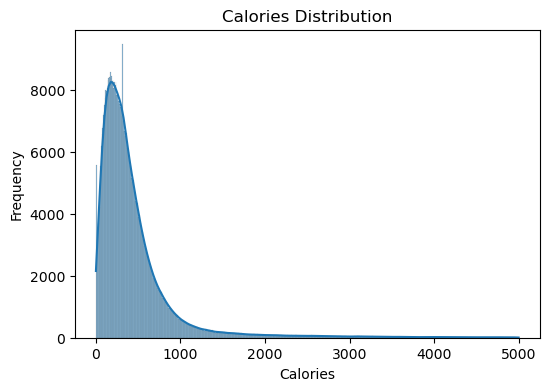

In [37]:
# plotting the distribution of calories values in the dataset  before normalization
plt.figure(figsize=(6, 4))
sns.histplot(recipe['Calories'], kde=True)
plt.title('Calories Distribution')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()


In [38]:
recipe.describe()

,Calories,FatContent,CarbohydrateContent,ProteinContent,FiberContent,SodiumContent,SugarContent,CholesterolContent
count,522512.000000,522512.000000,522512.000000,522512.000000,522512.000000,522512.000000,522512.000000,522512.000000
mean,445.061745,23.525727,46.827550,17.151759,3.808165,627.498736,20.963626,78.593008
std,512.040543,36.901262,78.529928,21.993438,6.053171,890.323479,56.375739,111.855325
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,174.200000,5.600000,12.800000,3.500000,0.800000,123.300000,2.500000,3.800000
50%,315.400000,13.700000,28.100000,9.100000,2.200000,350.800000,6.400000,42.100000
75%,522.900000,27.300000,50.900000,25.000000,4.500000,781.125000,17.900000,106.200000
max,4999.800000,499.600000,999.600000,499.000000,195.200000,9996.100000,999.200000,999.900000


In [39]:
from sklearn.preprocessing import normalize
import pandas as pd


# Select the relevant numeric columns for similarity
nutrition_cols = ['Calories', 'FatContent', 'CarbohydrateContent', 
                  'ProteinContent', 'FiberContent', 'SodiumContent', 
                  'SugarContent', 'CholesterolContent']

# Ensure there are no missing values — if needed, fill them first
recipe[nutrition_cols] = recipe[nutrition_cols].fillna(0)

# Apply L2 normalization (each row will have a unit norm)
normalized_array = normalize(recipe[nutrition_cols], norm='l2')

# Create a new DataFrame with normalized data
normalized_df = pd.DataFrame(normalized_array, columns=[col + '_norm' for col in nutrition_cols])

# Concatenate with original recipe DataFrame if needed
recipe = pd.concat([recipe, normalized_df], axis=1)


In [40]:
#get the name of diet first 10 
recipe['Name'].head(10)

0             low-fat berry blue frozen dessert
1                                       biryani
2                                 best lemonade
3                carina's tofu-vegetable kebabs
4                                  cabbage soup
5                          best blackbottom pie
6                        warm chicken a la king
7    buttermilk pie with gingersnap crumb crust
8                       a jad - cucumber pickle
9                          butter pecan cookies
Name: Name, dtype: object

In [41]:
# The 'Keywords' column is a list, so join it into a string for searching
def infer_meal_type(row):
    for field in ['RecipeCategory', 'Keywords', 'Name']:
        val = row[field]
        if isinstance(val, list):
            text = " ".join([str(x) for x in val]).lower()
        else:
            text = str(val).lower() if pd.notnull(val) else ''
        if 'breakfast' in text or 'brunch' in text:
            return 'breakfast'
        elif 'lunch' in text:
            return 'lunch'
        elif 'dinner' in text or 'supper' in text:
            return 'dinner'
        elif 'snack' in text:
            return 'snack'
    return 'general'

recipe['MealType'] = recipe.apply(infer_meal_type, axis=1)


In [42]:
recipe['MealType'].value_counts()

MealType
general      428631
breakfast     51495
lunch         40598
dinner         1419
snack           374
Name: count, dtype: int64

In [43]:

count=recipe['Images']=="character(0)"
print(f"Number of rows with 'Images' as 'character(0)': {count.sum()}")
# replace the character(0) with image not found
recipe['Images'] = recipe['Images'].replace("character(0)", "image not found")
recipe.head(5)

Number of rows with 'Images' as 'character(0)': 0


,Name,Description,Images,RecipeInstructions,Keywords,RecipeCategory,Calories,FatContent,CarbohydrateContent,ProteinContent,...,Type,Calories_norm,FatContent_norm,CarbohydrateContent_norm,ProteinContent_norm,FiberContent_norm,SodiumContent_norm,SugarContent_norm,CholesterolContent_norm,MealType
0,low-fat berry blue frozen dessert,make and share this low-fat berry blue frozen ...,[https://img.sndimg.com/food/image/upload/w_55...,"[Toss 2 cups berries with sugar., Let stand fo...","[Dessert, Low Protein, Low Cholesterol, Health...",frozen desserts,170.9,2.5,37.1,3.2,...,vegetarian,0.948322,0.013872,0.205867,0.017757,0.019976,0.165360,0.167579,0.044392,general
1,biryani,make and share this biryani recipe from food.com.,[https://img.sndimg.com/food/image/upload/w_55...,[Soak saffron in warm milk for 5 minutes and p...,"[Chicken Thigh & Leg, Chicken, Poultry, Meat, ...",chicken breast,1110.7,58.8,84.4,63.4,...,non-vegetarian,0.899876,0.047639,0.068380,0.051366,0.007292,0.298473,0.016528,0.302038,general
2,best lemonade,this is from one of my first good house keepi...,[https://img.sndimg.com/food/image/upload/w_55...,"[Into a 1 quart Jar with tight fitting lid, pu...","[Low Protein, Low Cholesterol, Healthy, Summer...",beverages,311.1,0.2,81.5,0.3,...,vegetarian,0.940619,0.000605,0.246417,0.000907,0.001209,0.005442,0.233416,0.000000,general
3,carina's tofu-vegetable kebabs,this dish is best prepared a day in advance to...,[https://img.sndimg.com/food/image/upload/w_55...,"[Drain the tofu, carefully squeezing out exces...","[Beans, Vegetable, Low Cholesterol, Weeknight,...",soy/tofu,536.1,24.0,64.2,29.3,...,vegetarian,0.324848,0.014543,0.038902,0.017754,0.010483,0.944429,0.019451,0.000000,general
4,cabbage soup,make and share this cabbage soup recipe from f...,[https://img.sndimg.com/food/image/upload/w_55...,"[Mix everything together and bring to a boil.,...","[Low Protein, Vegan, Low Cholesterol, Healthy,...",vegetable,103.6,0.4,25.1,4.3,...,vegetarian,0.107314,0.000414,0.026000,0.004454,0.004972,0.993693,0.018335,0.000000,general


In [44]:
#getting the images
recipe['Images'] = recipe['Images'].apply(lambda x: x if isinstance(x, list) else [x])
# Ensure all images are lists
recipe['Images'] = recipe['Images'].apply(lambda x: x if isinstance(x, list) else [x])
# Check the first few rows to confirm
recipe['Images'].head(5)

0    [https://img.sndimg.com/food/image/upload/w_55...
1    [https://img.sndimg.com/food/image/upload/w_55...
2    [https://img.sndimg.com/food/image/upload/w_55...
3    [https://img.sndimg.com/food/image/upload/w_55...
4    [https://img.sndimg.com/food/image/upload/w_55...
Name: Images, dtype: object

In [45]:
recipe['Keywords'].dropna().head(10)

0    [Dessert, Low Protein, Low Cholesterol, Health...
1    [Chicken Thigh & Leg, Chicken, Poultry, Meat, ...
2    [Low Protein, Low Cholesterol, Healthy, Summer...
3    [Beans, Vegetable, Low Cholesterol, Weeknight,...
4    [Low Protein, Vegan, Low Cholesterol, Healthy,...
5           [Dessert, Weeknight, Stove Top, < 4 Hours]
6                           [Poultry, Meat, < 60 Mins]
7       [Dessert, Healthy, Weeknight, Oven, < 4 Hours]
8                 [Thai, Asian, Free Of..., < 30 Mins]
9    [Cookie & Brownie, Fruit, Nuts, Weeknight, Ove...
Name: Keywords, dtype: object

In [46]:
recipe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522517 entries, 0 to 4591
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Name                      522512 non-null  object 
 1   Description               522512 non-null  object 
 2   Images                    522517 non-null  object 
 3   RecipeInstructions        522512 non-null  object 
 4   Keywords                  522512 non-null  object 
 5   RecipeCategory            522512 non-null  object 
 6   Calories                  522512 non-null  float64
 7   FatContent                522512 non-null  float64
 8   CarbohydrateContent       522512 non-null  float64
 9   ProteinContent            522512 non-null  float64
 10  FiberContent              522512 non-null  float64
 11  SodiumContent             522512 non-null  float64
 12  SugarContent              522512 non-null  float64
 13  CholesterolContent        522512 non-null  float64


In [47]:
#creating the train final dataset cleaned_recipes.csv
# recipe.to_csv('cleaned_recipes.csv', index=False)


In [ ]:
# import pandas as pd
# import re
# import numpy as np
# from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.preprocessing import MinMaxScaler
# from scipy.optimize import minimize

# # Load nutrient data
# nutrient = pd.read_csv('nutrient_cleaned.csv')
# calorie_lookup = dict(zip(nutrient['food'].str.lower(), nutrient['calories']))

# # -------------------------------------------
# # Helper Functions
# # -------------------------------------------
# def get_activity_multiplier(a):
#     return {
#         'walking': 1.2, 'yoga': 1.3, 'dancing': 1.45, 'weight training': 1.55,
#         'cycling': 1.6, 'basketball': 1.7, 'swimming': 1.75,
#         'tennis': 1.75, 'running': 1.8, 'hiit': 1.9
#     }.get(a.lower(), 1.2)

# def calculate_bmr(w, h, age, gender):
#     return 10 * w + 6.25 * h - 5 * age + (5 if gender else -161)

# def calculate_bmi(w, h):
#     h /= 100
#     return round(w / (h * h), 2)

# def get_image_url(x):
#     if isinstance(x, list) and x:
#         return x[0]
#     if isinstance(x, str) and x.startswith('http'):
#         return x
#     return "Image not found"

# def validate_user_input(user_input):
#     """Validate user input parameters"""
#     required_fields = ['gender', 'age', 'height_cm', 'weight_kg', 'goal', 'Type', 'meal_type']
#     for field in required_fields:
#         if field not in user_input:
#             raise ValueError(f"Missing required field: {field}")
    
#     if user_input['age'] <= 0 or user_input['age'] > 120:
#         raise ValueError("Age must be between 1-120")
#     if user_input['height_cm'] <= 0 or user_input['height_cm'] > 250:
#         raise ValueError("Height must be between 1-250 cm")
#     if user_input['weight_kg'] <= 0 or user_input['weight_kg'] > 500:
#         raise ValueError("Weight must be between 1-500 kg")

# # Enhanced portion guidelines
# portion_guidelines = {
#     'default': (50, 150),
    
#     # Proteins - moderate to high portions
#     'chicken': (80, 150),
#     'beef': (80, 150),
#     'fish': (100, 150),
#     'salmon': (80, 120),
#     'tuna': (80, 120),
#     'shrimp': (60, 100),
#     'egg': (50, 100),
#     'tofu': (60, 120),
#     'tempeh': (60, 100),
#     'turkey': (80, 150),
#     'pork': (80, 120),
#     'lamb': (80, 120),
#     'duck': (80, 120),
#     'cod': (100, 150),
#     'tilapia': (100, 150),
#     'mackerel': (80, 120),
#     'sardines': (60, 100),
#     'crab': (60, 100),
#     'lobster': (60, 100),
#     'scallops': (60, 100),
#     'mussels': (80, 120),
#     'oysters': (60, 100),
#     'cottage cheese': (80, 150),
#     'greek yogurt': (80, 150),
#     'protein powder': (20, 40),
#     'seitan': (60, 100),
    
#     # Legumes/Beans - moderate portions
#     'lentils': (40, 80),
#     'chickpeas': (40, 80),
#     'beans': (40, 80),
#     'kidney beans': (40, 80),
#     'black beans': (40, 80),
#     'navy beans': (40, 80),
#     'lima beans': (40, 80),
#     'pinto beans': (40, 80),
#     'garbanzo beans': (40, 80),
#     'edamame': (60, 100),
#     'split peas': (40, 80),
#     'black-eyed peas': (40, 80),
#     'fava beans': (40, 80),
    
#     # Grains - based on dry weight
#     'rice': (40, 80),
#     'brown rice': (40, 80),
#     'quinoa': (30, 60),
#     'pasta': (50, 100),
#     'bread': (25, 50),
#     'oats': (30, 60),
#     'barley': (40, 80),
#     'bulgur': (30, 60),
#     'wheat': (40, 80),
#     'buckwheat': (30, 60),
#     'millet': (30, 60),
#     'amaranth': (30, 60),
#     'couscous': (40, 80),
#     'farro': (40, 80),
#     'wild rice': (40, 80),
#     'corn': (80, 120),
#     'polenta': (40, 80),
#     'tortilla': (25, 50),
#     'bagel': (60, 100),
#     'cereal': (25, 50),
#     'crackers': (15, 30),
#     'noodles': (50, 100),
    
#     # Vegetables - larger portions allowed
#     'broccoli': (80, 150),
#     'spinach': (40, 100),
#     'kale': (40, 100),
#     'carrot': (60, 120),
#     'tomato': (80, 150),
#     'onion': (30, 80),
#     'potato': (120, 200),
#     'sweet potato': (120, 200),
#     'bell pepper': (50, 100),
#     'pepper': (50, 100),
#     'cucumber': (80, 150),
#     'zucchini': (80, 150),
#     'cauliflower': (80, 150),
#     'cabbage': (80, 150),
#     'lettuce': (40, 100),
#     'mushrooms': (80, 150),
#     'asparagus': (80, 150),
#     'green beans': (80, 150),
#     'peas': (60, 120),
#     'celery': (80, 150),
#     'radish': (40, 80),
#     'beets': (80, 120),
#     'turnip': (80, 120),
#     'parsnip': (80, 120),
#     'leek': (60, 120),
#     'artichoke': (80, 150),
#     'brussels sprouts': (80, 150),
#     'eggplant': (80, 150),
#     'okra': (80, 150),
#     'squash': (80, 150),
#     'pumpkin': (80, 150),
#     'garlic': (3, 10),
#     'ginger': (3, 10),
#     'herbs': (3, 15),
#     'avocado': (60, 120),
    
#     # Fruits - moderate portions
#     'apple': (120, 200),
#     'banana': (100, 150),
#     'orange': (120, 200),
#     'berries': (60, 120),
#     'grapes': (80, 120),
#     'strawberries': (80, 150),
#     'blueberries': (60, 120),
#     'raspberries': (60, 120),
#     'blackberries': (60, 120),
#     'pear': (120, 200),
#     'peach': (120, 200),
#     'plum': (80, 150),
#     'apricot': (80, 150),
#     'kiwi': (80, 120),
#     'mango': (120, 200),
#     'pineapple': (120, 200),
#     'watermelon': (150, 250),
#     'cantaloupe': (150, 250),
#     'honeydew': (150, 250),
#     'cherries': (80, 120),
#     'grapefruit': (150, 250),
#     'lemon': (30, 80),
#     'lime': (20, 60),
#     'coconut': (25, 60),
#     'dates': (25, 50),
#     'figs': (40, 80),
#     'raisins': (25, 50),
#     'cranberries': (25, 50),
#     'pomegranate': (80, 120),
#     'papaya': (120, 200),
    
#     # Fats/Oils - small portions
#     'oil': (3, 10),
#     'olive oil': (3, 10),
#     'coconut oil': (3, 10),
#     'butter': (3, 15),
#     'ghee': (3, 10),
#     'avocado oil': (3, 10),
#     'canola oil': (3, 10),
#     'sunflower oil': (3, 10),
#     'sesame oil': (3, 10),
#     'vegetable oil': (3, 10),
#     'margarine': (3, 15),
#     'lard': (3, 10),
#     'coconut butter': (8, 20),
    
#     # Nuts/Seeds - small portions due to high calories
#     'almonds': (10, 25),
#     'peanuts': (10, 25),
#     'cashews': (10, 25),
#     'seeds': (8, 20),
#     'sesame seeds': (8, 15),
#     'walnuts': (10, 25),
#     'pecans': (10, 25),
#     'pistachios': (10, 25),
#     'hazelnuts': (10, 25),
#     'brazil nuts': (10, 25),
#     'macadamia nuts': (10, 25),
#     'pine nuts': (8, 20),
#     'sunflower seeds': (10, 25),
#     'pumpkin seeds': (10, 25),
#     'flax seeds': (8, 20),
#     'chia seeds': (8, 20),
#     'hemp seeds': (10, 25),
#     'poppy seeds': (8, 15),
#     'peanut butter': (10, 25),
#     'almond butter': (10, 25),
#     'tahini': (10, 25),
#     'nutella': (10, 25),
    
#     # Dairy
#     'milk': (150, 250),
#     'yogurt': (80, 150),
#     'cheese': (15, 40),
#     'cream cheese': (10, 25),
#     'sour cream': (10, 25),
#     'heavy cream': (10, 25),
#     'mozzarella': (15, 40),
#     'cheddar': (15, 40),
#     'parmesan': (8, 25),
#     'feta': (15, 40),
#     'goat cheese': (15, 40),
#     'ricotta': (40, 80),
#     'cream': (25, 50),
#     'buttermilk': (150, 250),
#     'kefir': (150, 250),
#     'ice cream': (40, 100),
    
#     # Condiments & Seasonings
#     'salt': (1, 3),
#     'pepper': (1, 2),
#     'vinegar': (3, 10),
#     'soy sauce': (3, 10),
#     'hot sauce': (2, 8),
#     'mustard': (3, 10),
#     'ketchup': (8, 15),
#     'mayonnaise': (8, 15),
#     'honey': (8, 20),
#     'maple syrup': (8, 20),
#     'sugar': (3, 10),
#     'brown sugar': (3, 10),
#     'vanilla': (1, 3),
#     'cinnamon': (1, 3),
#     'paprika': (1, 3),
#     'turmeric': (1, 3),
#     'cumin': (1, 3),
#     'oregano': (1, 3),
#     'basil': (2, 8),
#     'thyme': (1, 3),
#     'rosemary': (1, 3),
#     'parsley': (3, 10),
#     'cilantro': (3, 10),
#     'dill': (2, 8),
#     'mint': (2, 8),
#     'lemon juice': (3, 10),
#     'lime juice': (3, 10),
#     'balsamic vinegar': (3, 10),
#     'worcestershire sauce': (2, 8),
#     'fish sauce': (2, 8),
#     'coconut milk': (40, 80),
#     'tomato paste': (8, 20),
#     'tomato sauce': (40, 80),
#     'pesto': (8, 20),
#     'salsa': (25, 50),
#     'hummus': (25, 50),
#     'guacamole': (25, 50),
# }

# def get_realistic_portions(ing_name, target_calories=400):
#     """
#     Get realistic portion sizes with calorie-based scaling
#     """
#     ing_lower = ing_name.lower()
#     base_min, base_max = portion_guidelines.get('default', (50, 150))
    
#     # Find specific ingredient guidelines
#     for key, (min_g, max_g) in portion_guidelines.items():
#         if key in ing_lower or ing_lower in key:
#             base_min, base_max = min_g, max_g
#             break
    
#     # Scale portions based on target meal size
#     if target_calories < 300:  # Small meal
#         scale_factor = 0.8
#     elif target_calories > 600:  # Large meal
#         scale_factor = 1.2
#     else:  # Normal meal
#         scale_factor = 1.0
    
#     return (int(base_min * scale_factor), int(base_max * scale_factor))

# def extract_ingredients(row):
#     """
#     Extract ingredients from recipe that exist in nutrient database
#     """
#     instr = row.get('RecipeInstructions', '')
#     ingredient_text = row.get('RecipeIngredientParts', '')
    
#     # Combine instruction and ingredient text
#     combined_text = ' '.join(instr if isinstance(instr, list) else [str(instr)]) + ' ' + str(ingredient_text)
    
#     # Find ingredients that exist in our nutrient database
#     found_ings = []
#     for ingredient in nutrient['food'].str.lower():
#         if re.search(rf'\b{re.escape(ingredient)}\b', combined_text.lower()):
#             found_ings.append(ingredient)
    
#     return list(set(found_ings))

# def calculate_actual_nutrition(optimized_quantities):
#     """
#     Calculate actual nutrition from optimized ingredient quantities
#     """
#     total_nutrition = {'calories': 0, 'protein': 0, 'fat': 0, 'carbs': 0, 'fiber': 0}
    
#     for ing, qty_str in optimized_quantities.items():
#         # Extract grams from string like "150g broccoli"
#         grams_match = re.search(r'(\d+)g', qty_str)
#         if grams_match:
#             grams = int(grams_match.group(1))
#             ing_data = nutrient[nutrient['food'].str.lower() == ing.lower()]
#             if not ing_data.empty:
#                 multiplier = grams / 100  # per 100g
#                 total_nutrition['calories'] += ing_data['calories'].values[0] * multiplier
#                 total_nutrition['protein'] += ing_data['protein'].values[0] * multiplier
#                 total_nutrition['fat'] += ing_data['fat'].values[0] * multiplier
#                 total_nutrition['carbs'] += ing_data['carbs'].values[0] * multiplier
#                 total_nutrition['fiber'] += ing_data['fiber'].values[0] * multiplier
    
#     return total_nutrition

# def optimize_ingredient_weights(ingredients, target_macros, recipe_name="", target_calories=400):
#     """
#     Optimizes ingredient quantities to match target calories/macros
#     Uses realistic portion sizes and cooking ratios with accuracy constraints (95-105%)
#     """
#     if len(ingredients) == 0:
#         return {}

#     # Build nutrition matrix with realistic constraints
#     valid_ingredients = []
#     bounds = []
#     base_portions = []
    
#     for ing in ingredients:
#         row = nutrient[nutrient['food'].str.lower() == ing.lower()]
#         if not row.empty:
#             valid_ingredients.append(ing)
#             min_g, max_g = get_realistic_portions(ing, target_calories)
#             bounds.append((min_g/100, max_g/100))  # Convert to 100g units
#             base_portions.append((min_g + max_g) / 200)  # Average as starting point

#     if len(valid_ingredients) == 0:
#         return {}

#     # Create nutrition matrix (per 100g)
#     nutrition_matrix = []
#     macros = ['calories', 'protein', 'fat', 'carbs', 'fiber']
    
#     for ing in valid_ingredients:
#         row = nutrient[nutrient['food'].str.lower() == ing.lower()]
#         nutrition_row = []
#         for macro in macros:
#             value = row[macro].values[0] if macro in row.columns else 0
#             nutrition_row.append(value)
#         nutrition_matrix.append(nutrition_row)
    
#     nutrition_matrix = np.array(nutrition_matrix)
#     target = np.array(target_macros)

#     def objective_function(portions):
#         # Calculate predicted nutrition
#         predicted = nutrition_matrix.T @ portions
        
#         # Weighted error (calories most important, then protein)
#         weights = np.array([3.0, 2.0, 1.0, 1.0, 0.5])  # calories, protein, fat, carbs, fiber
#         errors = np.abs(predicted - target) / (target + 1e-6)  # Relative error
        
#         # Penalty for unrealistic total portion size
#         total_weight = sum(portions) * 100  # Convert back to grams
#         if total_weight > 600:  # Penalty if meal > 600g
#             size_penalty = (total_weight - 600) / 100
#         elif total_weight < 150:  # Penalty if meal < 150g
#             size_penalty = (150 - total_weight) / 100
#         else:
#             size_penalty = 0
            
#         return np.sum(weights * errors**2) + size_penalty

#     try:
#         # Define constraints for calorie accuracy (95-105%)
#         def calorie_constraint(portions):
#             total_cals = nutrition_matrix[:, 0] @ portions
#             return total_cals
        
#         # Bounds for calories (95-105% of target)
#         calorie_lower = 0.95 * target_macros[0]
#         calorie_upper = 1.05 * target_macros[0]
        
#         constraints = [
#             {'type': 'ineq', 'fun': lambda x: calorie_constraint(x) - calorie_lower},
#             {'type': 'ineq', 'fun': lambda x: calorie_upper - calorie_constraint(x)}
#         ]
        
#         # Use realistic starting portions
#         initial_portions = np.array(base_portions)
        
#         # Optimize with realistic bounds and calorie constraints
#         result = minimize(
#             objective_function, 
#             initial_portions, 
#             bounds=bounds, 
#             method='SLSQP',
#             constraints=constraints,
#             options={'maxiter': 1000}
#         )
        
#         if result.success:
#             optimized_portions = result.x
#         else:
#             # Fallback with proportional scaling within bounds
#             total_base_calories = sum(
#                 nutrition_matrix[i][0] * base_portions[i] 
#                 for i in range(len(valid_ingredients))
#             )
            
#             if total_base_calories > 0:
#                 # Scale to hit target calories within bounds
#                 target_scale = min(1.05, max(0.95, target_macros[0] / total_base_calories))
#                 optimized_portions = [p * target_scale for p in base_portions]
#             else:
#                 optimized_portions = base_portions
        
#         # Convert to readable format
#         quantities = {}
#         total_cals = 0
        
#         for i, ing in enumerate(valid_ingredients):
#             grams = round(optimized_portions[i] * 100)
#             if grams >= 3:  # Only include meaningful amounts
#                 quantities[ing] = f"{grams}g {ing}"
#                 # Calculate calories for this ingredient
#                 ing_cals = nutrition_matrix[i][0] * optimized_portions[i]
#                 total_cals += ing_cals
        
#         return quantities
        
#     except Exception as e:
#         print(f"❌ Optimization failed for {recipe_name}: {e}")
#         # Simple fallback: reasonable portions
#         fallback_quantities = {}
#         for ing in valid_ingredients[:4]:  # Limit to 4 main ingredients
#             min_g, max_g = get_realistic_portions(ing, target_calories)
#             avg_g = (min_g + max_g) // 2
#             fallback_quantities[ing] = f"{avg_g}g {ing}"
#         return fallback_quantities

# def inject_quantities_into_instructions(instructions, quantities):
#     """
#     Injects calculated quantities into recipe instructions
#     """
#     if isinstance(instructions, str):
#         instructions = [instructions]

#     updated_steps = []
#     for step in instructions:
#         original_step = step
#         for ing, qty in quantities.items():
#             # Match the whole word, case insensitive, and replace only once per step
#             pattern = rf'\b{re.escape(ing)}\b'
#             step, count = re.subn(pattern, qty, step, count=1, flags=re.IGNORECASE)
#             if count > 0:
#                 continue

#         # Clean up leading numbers/symbols and capitalize first letter
#         clean_step = re.sub(r'^[0-9. )-]+', '', step).strip()
#         if clean_step:
#             clean_step = clean_step[0].upper() + clean_step[1:]

#         updated_steps.append(clean_step if clean_step else original_step)

#     # Number the steps
#     return '\n'.join(f"{i+1}. {line}" for i, line in enumerate(updated_steps))

# CALORIE_DELTAS = {
#     'weight_loss': (-700, -300),
#     'maintain': (0, 0),
#     'weight_gain': (300, 700)
# }

# def calorie_target(bmr, goal, intensity='moderate', feedback=None):
#     """
#     Adaptive calorie target calculation.
#     goal: 'weight_loss', 'weight_gain', 'maintain'
#     intensity: 'light', 'moderate', or 'intense'
#     feedback: Optional dict, e.g. {'achieved': False, 'trend': 'under'}
#     """
#     delta_range = CALORIE_DELTAS.get(goal, (0, 0))
#     intensity_levels = {'light': 0.3, 'moderate': 0.5, 'intense': 1.0}
#     multiplier = intensity_levels.get(intensity, 0.5)
#     delta = int(delta_range[0] + (delta_range[1] - delta_range[0]) * multiplier)

#     if feedback:
#         if not feedback['achieved']:
#             if feedback['trend'] == 'under':
#                 delta += 100
#             elif feedback['trend'] == 'over':
#                 delta -= 100

#     return round(bmr + delta)

# # -------------------------------------------
# # Main Function with Accuracy Constraints
# # -------------------------------------------
# def suggest_diet(user_input: dict, recipe_df: pd.DataFrame, max_meals: int = 5, tolerance: float = 0.05):
#     """
#     Main function that suggests optimized diet plan with accuracy constraints (95-105%)
#     """
#     # Validate input
#     validate_user_input(user_input)
    
#     nutrient_cols = ['Calories', 'FatContent', 'CarbohydrateContent', 'ProteinContent', 'FiberContent']
#     df = recipe_df.copy()

#     # ---------------- Filters ----------------
#     df = df[df['Type'].str.lower() == user_input['Type'].lower()]
#     df = df[df['MealType'].str.lower() == user_input['meal_type'].lower()]
    
#     # Apply health condition filters
#     for cond in [c.lower() for c in user_input.get('health_conditions', [])]:
#         if cond == 'diabetes':
#             df = df[df['SugarContent'] <= 10]
#         elif cond == 'hypertension':
#             df = df[df['SodiumContent'] <= 400]
#         elif cond == 'asthma':
#             df = df[~df['RecipeInstructions'].astype(str).str.contains('dairy', na=False, case=False)]
#         elif cond == 'allergy':
#             for allergen in [a.lower() for a in user_input.get('allergies', [])]:
#                 df = df[~df['RecipeInstructions'].astype(str).str.contains(allergen, na=False, case=False)]
#                 if 'RecipeIngredientParts' in df.columns:
#                     df = df[~df['RecipeIngredientParts'].astype(str).str.contains(allergen, na=False, case=False)]

#     if df.empty:
#         return {
#             "bmr": None, "bmi": None, "tdee": None,
#             "calorie_target": None, "actual_calories": 0, "diet_plan": []
#         }

#     # ---------------- Calculations ----------------
#     bmr = calculate_bmr(user_input['weight_kg'], user_input['height_cm'], user_input['age'], user_input['gender'])
#     tdee = round(bmr * get_activity_multiplier(user_input.get('activity_type', 'walking')), 2)
    
#     goal = re.sub(r'[^a-z]', '_', user_input['goal'].lower())
#     goal_key = {
#         'wt_loss': 'weight_loss', 'weight_loss': 'weight_loss',
#         'wt_gain': 'weight_gain', 'weight_gain': 'weight_gain',
#         'maintain': 'maintain'
#     }.get(goal, 'maintain')
    
#     intensity = user_input.get('goal_intensity', 'moderate')
#     feedback = user_input.get('yesterday_feedback', None)
#     cal_target = round(calorie_target(tdee, goal_key, intensity, feedback), 2)
#     bmi = calculate_bmi(user_input['weight_kg'], user_input['height_cm'])

#     # ---------------- Nutrition Vector ----------------
#     df = df.dropna(subset=nutrient_cols)
#     df[nutrient_cols] = df[nutrient_cols].apply(pd.to_numeric, errors='coerce')
#     df = df.dropna(subset=nutrient_cols)

#     target_vec = [
#         cal_target,
#         cal_target * 0.25 / 9,  # fat
#         cal_target * 0.5 / 4,   # carbs
#         cal_target * 0.25 / 4,  # protein
#         cal_target * 0.035      # fiber
#     ]

#     scaler = MinMaxScaler()
#     scaled = scaler.fit_transform(df[nutrient_cols])
#     sim = cosine_similarity([scaler.transform([target_vec])[0]], scaled)[0]
#     df['similarity'] = sim

#     # ---------------- Meal Selection & Optimization ----------------
#     diet, kcal_sum = [], 0
    
#     for meal_index, (_, row) in enumerate(df.sort_values('similarity', ascending=False).iterrows()):
#         if len(diet) >= max_meals:
#             break
            
#         # Calculate target calories for THIS meal with accuracy bounds
#         meals_remaining = max_meals - meal_index
#         calories_remaining = max(0, cal_target - kcal_sum)
        
#         # Stop if we've hit our target (with tolerance)
#         if calories_remaining <= cal_target * tolerance:
#             break
            
#         # Target calories for this specific meal (with 95-105% bounds)
#         if meals_remaining > 0:
#             target_calories_this_meal = min(
#                 max(200, calories_remaining / meals_remaining),
#                 800
#             )
#         else:
#             target_calories_this_meal = min(
#                 max(200, calories_remaining),
#                 800
#             )
        
#         # Calculate proportional macros for this meal
#         target_macros = [
#             target_calories_this_meal,
#             target_calories_this_meal * 0.25 / 4,  # protein (25% of calories)
#             target_calories_this_meal * 0.25 / 9,  # fat (25% of calories) 
#             target_calories_this_meal * 0.5 / 4,   # carbs (50% of calories)
#             target_calories_this_meal * 0.035      # fiber (~35g per 1000 kcal)
#         ]
        
#         # Extract ingredients from recipe
#         found_ings = extract_ingredients(row)
        
#         # Optimize with accuracy constraints
#         optimized_quantities = optimize_ingredient_weights(
#             found_ings, target_macros, row['Name'], target_calories_this_meal
#         )
        
#         # Calculate actual nutrition from optimized ingredients
#         actual_nutrition = calculate_actual_nutrition(optimized_quantities)
        
#         # Only add meal if it's within our accuracy bounds (95-105%)
#         calorie_ratio = actual_nutrition['calories'] / target_calories_this_meal if target_calories_this_meal > 0 else 1
#         if 0.95 <= calorie_ratio <= 1.05 and len(optimized_quantities) > 0:
#             # Inject quantities into instructions
#             instructions_with_quantities = inject_quantities_into_instructions(
#                 row.get('RecipeInstructions', ''), optimized_quantities
#             )
            
#             diet.append({
#                 'Name': row['Name'],
#                 'Target Calories': round(target_calories_this_meal, 1),
#                 'Actual Calories': round(actual_nutrition['calories'], 1),
#                 'Calories (kcal)': round(actual_nutrition['calories'], 1),
#                 'Protein (g)': round(actual_nutrition['protein'], 1),
#                 'Fat (g)': round(actual_nutrition['fat'], 1),
#                 'Carbs (g)': round(actual_nutrition['carbs'], 1),
#                 'Fiber (g)': round(actual_nutrition['fiber'], 1),
#                 'Sugar (g)': round(row.get('SugarContent', 0), 1),
#                 'Sodium (mg)': round(row.get('SodiumContent', 0), 1),
#                 'Image': get_image_url(row.get('Images')),
#                 'Optimized Ingredients': list(optimized_quantities.values()),
#                 'Instructions': instructions_with_quantities,
#                 'Calorie Match %': round(calorie_ratio * 100, 1)
#             })
            
#             kcal_sum += actual_nutrition['calories']
            
#             # Early
            
# #             # Early exit if we're close to target
#             if kcal_sum >= cal_target * (1 - tolerance):
#                 break

#     return {
#         "bmr": round(bmr, 2),
#         "bmi": bmi,
#         "tdee": tdee,
#         "calorie_target": cal_target,
#         "actual_calories": round(kcal_sum, 1),
#         "diet_plan": diet,
#         "calorie_accuracy": round((kcal_sum / cal_target) * 100, 1) if cal_target > 0 else 0
#     }

# # # -------------------------------------------
# # # Example Usage
# # # -------------------------------------------
# if __name__ == "__main__":
   
    
#     user_input = {
#         'gender': 1,  # 1 for male, 0 for female
#         'age': 20,
#         'height_cm': 170,
#         'weight_kg': 50,
#         'goal': 'weight_gain',  # e.g. 'weight_loss', 'weight_gain', 'maintain'
#         'Type': 'non-vegetarian',
#         'meal_type': 'general',
#         'health_conditions': ['diabetes'],  # e.g. ['diabetes', 'hypertension'],
#         'activity_type': 'hitt'
#     }

#     print("🔄 Generating optimized diet plan...")
#     result = suggest_diet(user_input, recipe)

#     print("\n" + "="*60)
#     print("📊 DIET OPTIMIZATION RESULTS")
#     print("="*60)
#     print(f"🔥 BMR: {result['bmr']} kcal/day")
#     print(f"📈 BMI: {result['bmi']}")
#     print(f"⚡ TDEE: {result['tdee']} kcal/day")
#     print(f"🎯 Calorie Target: {result['calorie_target']} kcal/day")
    
#     print(f"✅ Actual Calories: {result['actual_calories']} kcal/day")
#     print(f"🎪 Accuracy: {result['calorie_accuracy']}%")
#     print(f"🍽️ Number of meals: {len(result['diet_plan'])}")

#     print("\n" + "="*60)
#     print("🍽️ OPTIMIZED MEAL PLAN")
#     print("="*60)

#     for i, meal in enumerate(result['diet_plan'], 1):
#         print(f"\n🥗 Meal {i}: {meal['Name']}")
#         print(f"   Calories: {meal['Calories (kcal)']}")
#         print(f"   🥩 Protein: {meal['Protein (g)']}g")
#         print(f"   🧈 Fat: {meal['Fat (g)']}g") 
#         print(f"   🍞 Carbs: {meal['Carbs (g)']}g")
#         print(f"   🌾 Fiber: {meal['Fiber (g)']}g")
#         print(f"   📝  Ingredients:")
#         for ingredient in meal['Optimized Ingredients']:
#             print(f"      • {ingredient}")
#         print(f"   👨‍🍳 Instructions:")
#         for line in meal['Instructions'].split('\n'):
#             print(f"      {line}")

🔄 Generating optimized diet plan...


/usr/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(



📊 DIET OPTIMIZATION RESULTS
🔥 BMR: 1467.5 kcal/day
📈 BMI: 17.3
⚡ TDEE: 1761.0 kcal/day
🎯 Calorie Target: 2261 kcal/day
✅ Actual Calories: 2246.1 kcal/day
🎪 Accuracy: 99.3%
🍽️ Number of meals: 3

🍽️ OPTIMIZED MEAL PLAN

🥗 Meal 1: southern plantation lima beans
   Calories: 760.6
   🥩 Protein: 4.8g
   🧈 Fat: 36.3g
   🍞 Carbs: 80.0g
   🌾 Fiber: 40.0g
   📝  Ingredients:
      • 3g oil
      • 120g pepper
      • 67g bacon
   👨‍🍳 Instructions:
      1. Sift through the beans for <U+0093>Foreign Bodies<U+0094> and rinse.
      2. In a stock pot
      3. Cover the beans with 2 inches of water and soak for 4-5 hours.
      4. Chop the baked ham rind to about 1/4 inch squares.
      5. If you use 67g bacon
      6. Cook it off about three quarters of the way to render out some of the fat and drain well before chopping.
      7. (Reserve the fat for the roux later
      8. At your option!) Drain the soaking water
      9. Add the meat to the beans and cover with water by about 2 inches.
      1